## Observations and Insights 

In [124]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge (study_results, mouse_metadata, how ='inner', on = "Mouse ID")

# Display the data table for preview
combined_data_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [125]:
# Checking the number of mice.
combined_data_df["Mouse ID"].nunique()


249

In [126]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ID = combined_data_df.loc[combined_data_df.duplicated(["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_ID

array(['g989'], dtype=object)

In [127]:
# Optional: Get all the data for the duplicate mouse ID - 'g989'
duplicate_ID_data= combined_data_df.loc[combined_data_df["Mouse ID"]=='g989']
duplicate_ID_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [128]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.** Need to remove 'g989'?*
clean_df = combined_data_df.loc[combined_data_df['Mouse ID'] != 'g989']
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [129]:
# Checking the number of mice in the clean DataFrame. ##output should be 248##
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [130]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen

drug_regimen = clean_df.groupby(["Drug Regimen"])
# drug_regimen.count()

# Calculate the mean of the tumor volume for each drug regimen
tumor_mean = drug_regimen["Tumor Volume (mm3)"].mean()

# Calculate the median of the tumor volume for each drug regimen
tumor_median = drug_regimen["Tumor Volume (mm3)"].median()

# Calculate the variance of the tumor volume for each drug regimen
tumor_variance = drug_regimen["Tumor Volume (mm3)"].var()

# Calculate the standard deviation of the tumor volume for each drug regimen
tumor_std_dev = drug_regimen["Tumor Volume (mm3)"].std()

# Calculate the SEM of the tumor volume for each drug regimen
tumor_sem = drug_regimen["Tumor Volume (mm3)"].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_df = pd.DataFrame({"Mean Tumor Volume":tumor_mean,"Median Tumor Volume":tumor_median,"Tumor Volume Variance": tumor_variance, "Tumor Volume Std. Dev.": tumor_std_dev, "Tumor Volume Std. Err.": tumor_sem})
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [137]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function ** .agg() function **

summary_stats_table = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_stats_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

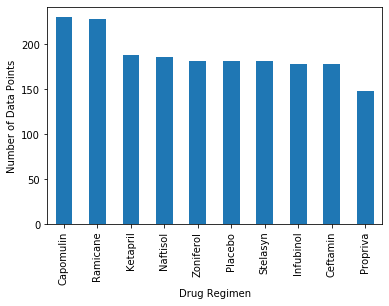

In [138]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
total = clean_df["Drug Regimen"].value_counts()
# total
total.plot(kind = "bar")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.show()


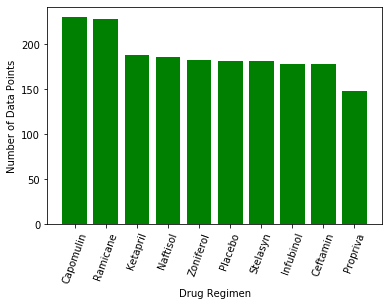

In [139]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
total = clean_df["Drug Regimen"].value_counts()
# total
x_axis = total.index
y_axis = total.values
plt.bar(x_axis,y_axis, color = 'g')
plt.xticks(rotation = 70)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.show()


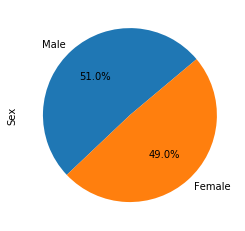

In [140]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
dist_mf = clean_df["Sex"].value_counts()
# dist_mf.values
dist_mf.plot.pie(y = dist_mf.values, autopct ='%1.1f%%', startangle = 40)


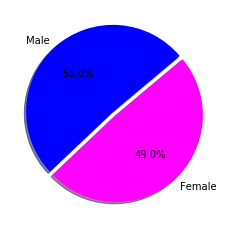

In [141]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
dist_mf = clean_df["Sex"].value_counts()
labels = dist_mf.index 
sizes = dist_mf.values
colors = ["blue", "magenta"]
explode = (0.05,0)
plt.pie(sizes, explode = explode,labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 40)
plt.show()


## Quartiles, Outliers and Boxplots

In [142]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest = clean_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df= clean_df.merge(greatest,on=["Mouse ID","Timepoint"],how="inner")
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
243,t565,45,34.455298,0,Capomulin,Female,20,17
244,i557,45,47.685963,1,Capomulin,Female,1,24
245,m957,45,33.329098,1,Capomulin,Female,3,19
246,f966,20,30.485985,0,Capomulin,Male,16,17


In [153]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset     
    # Determine outliers using upper and lower bounds

treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
tumor_data =[]
    
for name in treatments:
    final_vol = clean_df.loc[clean_df["Drug Regimen"]== name, "Tumor Volume (mm3)"]                  
    tumor_data.append(final_vol)
#   print(f"{name}'s final volume: {tumor_data}")   
    
    quartiles = final_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_vol.loc[(final_vol < lower_bound) | (final_vol > upper_bound)]
    print(f"The {name}'s potential outliers: {outliers}") 
#     print(f"The {name}'s values below {lower_bound} could be outliers.")
#     print(f"The {name}'s values above {upper_bound} could be outliers.")

The Capomulin's potential outliers: 1699    25.472143
1700    23.343598
Name: Tumor Volume (mm3), dtype: float64
The Ramicane's potential outliers: 514    22.050126
Name: Tumor Volume (mm3), dtype: float64
The Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
The Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


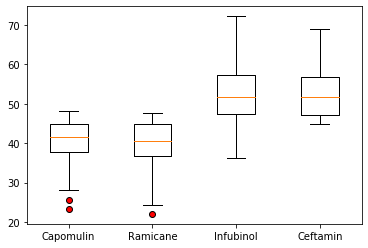

In [154]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_data,labels=treatments,flierprops={'markerfacecolor':'red','markersize':6})
plt.show()

## Line and Scatter Plots

In [155]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_plot_df = clean_df.loc[clean_df["Mouse ID"] == "b128"]
line_plot_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


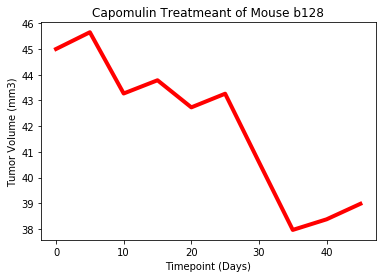

In [156]:
x_axis_tp = line_plot_df["Timepoint"]
tum_vol = line_plot_df["Tumor Volume (mm3)"]

plt.plot(x_axis_tp, tum_vol, color = 'red', linewidth = 4)
plt.title('Capomulin Treatmeant of Mouse b128')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

ValueError: x and y must be the same size

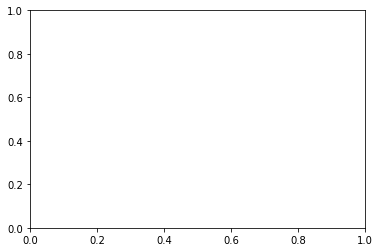

In [157]:
cap = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
# cap.head()
cap_tumor_mean = cap['Tumor Volume (mm3)'].mean()
weight = cap['Weight (g)']/cap_tumor_mean
plt.scatter(weight, cap_tumor_mean, facecolors = "red", edgecolors = "black")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


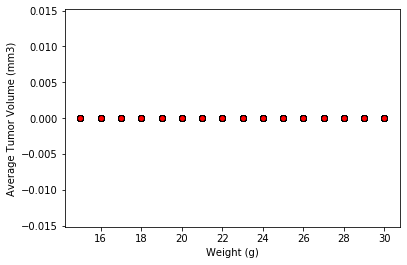

In [103]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# is this calculation for a specific mouse ID?

x_axis = clean_df["Weight (g)"]
y_axis = clean_df["Tumor Volume (mm3)"]=='Capomulin'
# y_axis = summary_df.loc[summary_df['Mean Tumor Volume']
plt.scatter(x_axis, y_axis, facecolors = "red", edgecolors = "black")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

ValueError: x and y must be the same size

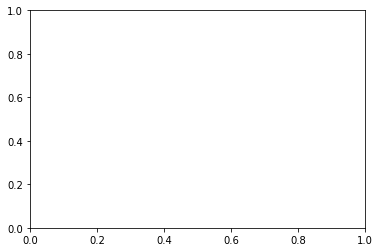

In [102]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# capomulin = combined_data_df.groupby("Drug Regimen")

capomulin = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
# capomulin

x_axis = capomulin["Weight (g)"]
y_axis = capomulin ["Tumor Volume (mm3)"].mean()
plt.scatter(x_axis, y_axis, facecolors = "red", edgecolors = "black")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [ ]:
#CLASS EXAMPLE CORRELATION # The next example will compute the Pearson correlation coefficient between "Income per Capita" and "Average Alcohol Consumed"
income = who_data.iloc[:,1]
alcohol = who_data.iloc[:,8]
correlation = st.pearsonr(income,alcohol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [ ]:
#CLASS EXAMPLE # Add the linear regression equation and line to plot
x_values = housing_data['RM']
y_values = housing_data['MEDV']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.show()